<a href="https://colab.research.google.com/github/hjgobbo/python_course/blob/main/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Imagens** em Python

"Análise de imagens é a **extração de informações** significativas de imagens; principalmente de **imagens digitais** por meio de técnicas de processamento digital de imagens." [SOLOMON, Chris; BRECKON, Toby *in* Wikipedia](https://en.wikipedia.org/wiki/Image_analysis#cite_note-solomonbreckon10fundamentals-1)

# Roteiro

1. Sobre "imagens digitais";

2. Sobre "extrair informações de imagens";

3. Sobre problemas grandes e estratégias para resolvê-los.

4. O Fim.

# Imagens digitais

In [ ]:
from matplotlib import pyplot, image      # Módulos para leitura e exibição de imagens.
import numpy                              # Pacote para manipulação de dados multidimensionais.

In [ ]:
img1 = image.imread('python_course/input/titanium_oxide.jpg')   # Atribuição de imagem à variável.

print(type(img1))
print(img1.shape)
print(img1)

In [ ]:
print(img1.max()) # Valor máximo de um dos canais da 'img1'
print(img1.min()) # Valor mínimo de um dos canais da 'img1'

> 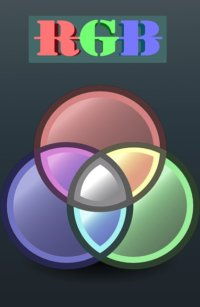



In [ ]:
pyplot.figure(figsize=(8,6))    # Exibição da imagem: definição do tamanho.
pyplot.imshow(img1)             # Exibição da imagem.

In [ ]:
def separate_rgb(picture, channel="R"):
  '''
  separate_rgb: retorna uma imagem contendo apenas um canal de cor RGB.

    picture: imagem a ser processada. type: 'numpy.ndarray'.

    channel: canal de cor a ser preservado. R = vermelho, G = verde, B = azul.
  '''
  condition = {
      'R': 0,
      'G': 1,
      'B': 2
  }

  n = condition[channel.upper()] # Atribui a posição do canal a ser preservado.

  new_picture = numpy.zeros((len(picture), len(picture[0]), 3), dtype='uint8') # Definição de uma matriz nula com dimensões de 'picture'.
  
  # Substitui nas posições da matriz nula os valores de cor do canal selecionado.
  for i in range(len(picture)):
    for j in range(len(picture[0])):
      new_picture[i][j][n] = picture[i][j][n]
  # -----------------------------------------------------------------------------

  return new_picture

In [ ]:
img1_red = separate_rgb(img1, channel= 'R')     # Separação do canal 'vermelho' de 'img1'.
img1_green = separate_rgb(img1, channel= 'G')   # Separação do canal 'verde' de 'img1'.
img1_blue = separate_rgb(img1, channel= 'B')    # Separação do canal 'azul' de 'img1'.

pyplot.figure(figsize=(20, 30))                 # Exibição da imagem: definição do tamanho.
pyplot.subplot(131),pyplot.imshow(img1_red)     # Exibição da imagem: linha 1, coluna 1.
pyplot.subplot(132),pyplot.imshow(img1_green)   # Exibição da imagem: linha 1, coluna 2.
pyplot.subplot(133),pyplot.imshow(img1_blue)    # Exibição da imagem: linha 1, coluna 3.

In [ ]:
print(img1_green)

Resumir é possível!

>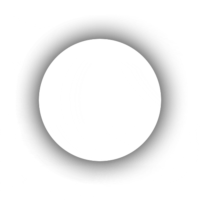

In [ ]:
def to_gray(picture):
  '''
  to_gray: retorna uma imagem em escala de cinza, combinando os canais RGB.

    picture: imagem a ser processada. type: 'numpy.ndarray'.
  '''

  new_picture = numpy.zeros((len(picture), len(picture[0])), dtype='uint8') # Definição de uma matriz nula com mesmo número de linhas e colunas de 'picture'.

  # Substitui nas posições da matriz nula o valor de cinza calculado.
  for i in range(len(picture)):
    for j in range(len(picture[0])):
      new_picture[i][j] = 0.21*picture[i][j][0] + 0.72*picture[i][j][1] + 0.07*picture[i][j][2] # Média ponderada dos valores de cor.
  # -----------------------------------------------------------------
  
  return new_picture

In [ ]:
img1_gray = to_gray(img1)                 # Conversão de 'img1' para níveis de cinza.

pyplot.figure(figsize=(8,6))              # Exibição da imagem: definição do tamanho.
pyplot.imshow(img1_gray, cmap = 'gray')   # Exibição da imagem.            

In [ ]:
print(type(img1_gray))
print(img1_gray.shape)
print(img1_gray)

# Extrair informações de imagens


In [ ]:
pyplot.figure(figsize=(15, 20))                                                   # Exibição da imagem: definição do tamanho.
pyplot.suptitle("Óxido de titânio em pó", color = 'white', fontsize = 20, y=0.63) # Exibição da imagem: definição do título.
pyplot.subplot(121),pyplot.imshow(img1)                                           # Exibição da imagem: linha 1, coluna 1.
pyplot.subplot(122),pyplot.imshow(img1_gray, cmap='gray')                         # Exibição da imagem: linha 1, coluna 2.

"The dark side of the powder"

> 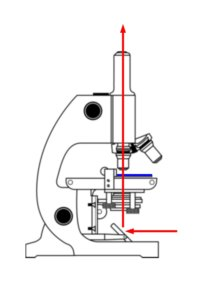

In [ ]:
pyplot.hist(img1_gray.flat, bins=100, range=(0,255)) # Contrução de histograma com amostra dos níveis de cinza de 'img1'

In [ ]:
def threshold(picture, gray_level = 128):
  '''
  threshold: retorna uma imagem contendo uma máscara definida apartir de um valor de nível de cinza.

    picture: imagem a ser processada. type: 'numpy.ndarray'.

    gray_level: nível de cinza limiar escolhido para elaboração da máscara.
  '''

  new_picture = numpy.zeros((len(picture), len(picture[0])), dtype='uint8') # Definição de uma matriz nula com mesmo número de linhas e colunas de 'picture'.
 
  # Substitui na posição da matriz nula (branco) o valor 255 (preto) quando a equivalente na imagem é maior que o limiar.
  for i in range(len(picture)):
    for j in range(len(picture[0])):
      if picture[i][j] > gray_level:
        new_picture[i][j] = 255
  # ---------------------------------------------------------------------------------------------------------------------
  
  return new_picture

In [ ]:
threshold_img1 = threshold(img1_gray, gray_level=50) # Criação de máscara apartir de 'img1'.

pyplot.figure(figsize=(8,6))                         # Exibição da imagem: definição do tamanho.
pyplot.imshow(threshold_img1, cmap='gray')           # Exibição da imagem.

In [ ]:
def sort_line(picture):
  '''
  sort_line: retorna uma imagem em escala de cinza, com os valores dos pixels em ordem crescente em cada uma das linhas.

    picture: imagem em escala de cinza a ser processada. type: 'numpy.ndarray'.
  '''

  new_picture = numpy.zeros((len(picture), len(picture[0])), dtype='uint8') # Definição de uma matriz nula com mesmo número de linhas e colunas de 'picture'.

  # Substitui nas posições da matriz nula os valores em ordem crescente dos pixels de 'picture'.
  for i in range(len(picture)):
      new_picture[i] = sorted(list(picture[i]))
  # -----------------------------------------------------------------
  
  return new_picture

In [ ]:
sorted_img1 = sort_line(img1_gray)

pyplot.figure(figsize=(8,6))              # Exibição da imagem: definição do tamanho.
pyplot.imshow(sorted_img1, cmap = 'gray')   # Exibição da imagem.

In [ ]:
pyplot.hist(sorted_img1.flat, bins=100, range=(0,255)) # Contrução de histograma com amostra dos níveis de cinza de 'img1'

## Determinação de características dimensionais das partículas

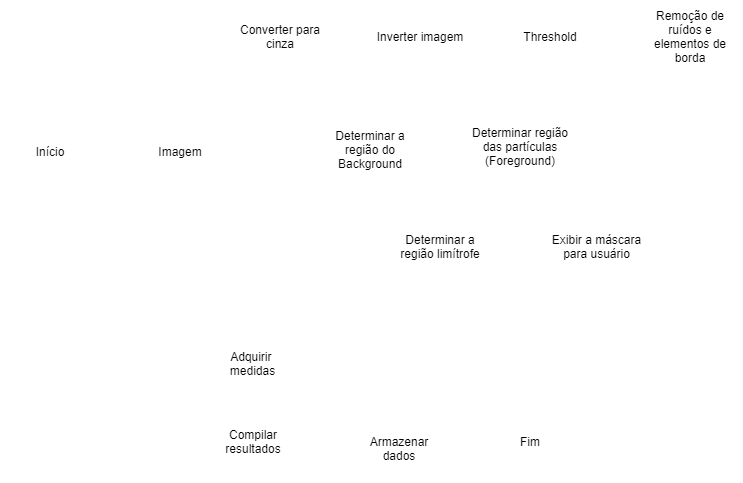

In [ ]:
import cv2                                            # Biblioteca (OpenCV) para realizar processamento de imagens.
from skimage import measure, color, io                # Módulos para realizar análise de imagens.
from skimage.segmentation import clear_border

image = cv2.imread("/content/titanium_oxide.jpg")     # Atribuição de imagem à variável.

image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # Conversão de 'image' para níveis de cinza.
image1 = cv2.bitwise_not(image1)                      # Inversão de cores (necessária ao processamento).

pixels_to_um = 1.2                                    # Estabelecimento da escala 1 pixel = 1,2 um.

ret1, thresh = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #Limiarização (threshold) automática: método da variância mínima.

kernel = numpy.ones((3,3), dtype='uint8')
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)  # Remoção de ruido (pixels).
opening = clear_border(opening)                                           # Desconsideração de partículas na borda da imagem.

# Determinação da região de fronteira entre as partículas e o fundo
sure_bg = cv2.dilate(opening,kernel,iterations=1) # Erosão para marcar o fundo

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # Determinação do centro das partículas (pixel central tem o valor aumetado pela distância que está da borda).
ret2, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0) #Limiarização (threshold) a partir dos valores dos pixel centrais das partículas.
sure_fg = numpy.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg) # Determinação da região limitrofe entre o fundo e as partículas

# Criação de uma máscara: fundo e partículas pussuem valores positivos, a região limítrofe valores nulos
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0
# ------------------------------------------------------------------------------------------------------

markers = cv2.watershed(image,markers) # Máscara é aplicada na imagem.
image2 = color.label2rgb(markers, bg_label=0) # Regiões limitrofe são marcadas

pyplot.figure(figsize=(10,8))
pyplot.imshow(image2)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------

regions = measure.regionprops(markers, intensity_image=image1) # Medidas são tomadas nas áreas (partículas) delimitadas pela máscara. 

propList = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter']  # Parâmetros medidos.  
    
output_file = open('particles_measurements.csv', 'w') # Arquivo CSV é compilado com o resultado das medidas tomadas.
output_file.write(',' + ",".join(propList) + '\n')

for region_props in regions:
  output_file.write(str(region_props['Label']))
  for i, prop in enumerate(propList):
    if (prop == 'Area'): 
      to_print = region_props[prop]*pixels_to_um**2
    else: 
      to_print = region_props[prop]
    output_file.write(',' + str(to_print))
  output_file.write('\n')

In [ ]:
import pandas

df = pandas.read_csv("/content/particles_measurements.csv")
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(0)

df.head()

In [ ]:
df.describe()

# Sobre problemas grandes e estratégias para resolvê-los.

In [ ]:
img2 = cv2.imread("python_course/input/SEM 1600x.jpg") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # conversão para níveis de cinza

print(img2)
print(type(img2))
print(img2.shape)

pyplot.figure(figsize=(8,6))
pyplot.imshow(img2, cmap='gray')

In [ ]:
pyplot.hist(img2.flat, bins=100, range=(0,255))

In [ ]:
ret1, thresh = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

pyplot.figure(figsize=(8,6))
pyplot.imshow(thresh, cmap='gray')

Solução razoável: Machine Learning!

> 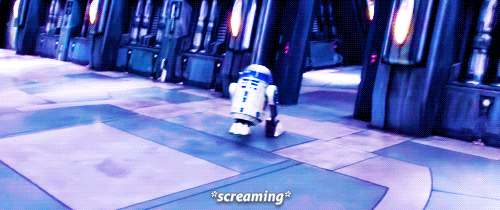

> 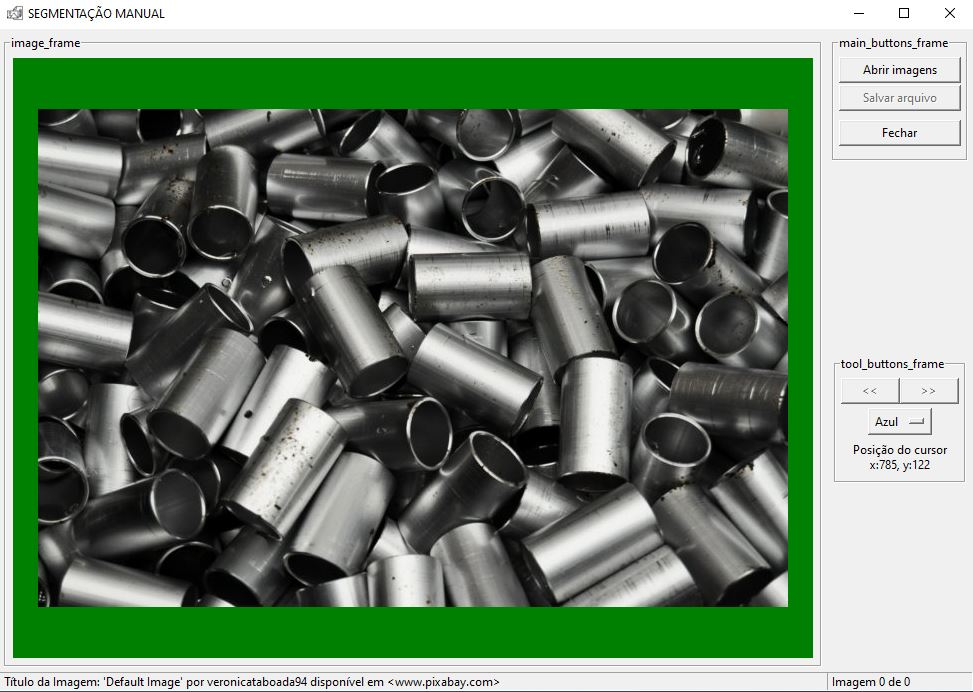

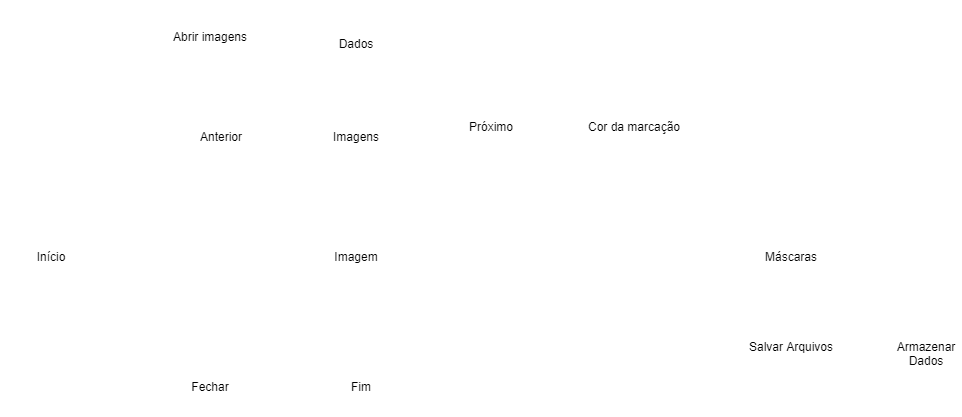

# ~O Fim~

Na verdade, o Princípio...

> 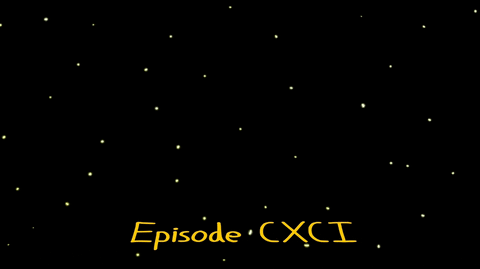



**Informações úteis**

* [link do github para a interface gráfica](https://github.com/hjgobbo/python_course)

* Imagens retiradas de [Pixabay](https://pixabay.com/pt/), [Giphy](https://giphy.com/) e da biblioteca pessoal do autor.

* Agradecimentos ao professor Sreenivas Bhattiprolu que ministra o curso ["Python for Microscopists"](https://www.youtube.com/watch?v=AsTvGxuiqKs). O código para análise de partículas foi adaptado de uma de suas aulas.